In [1]:
import pandas as pd
import matplotlib
print(matplotlib.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots
from scipy.signal import correlate
from IPython.display import Image

3.7.0


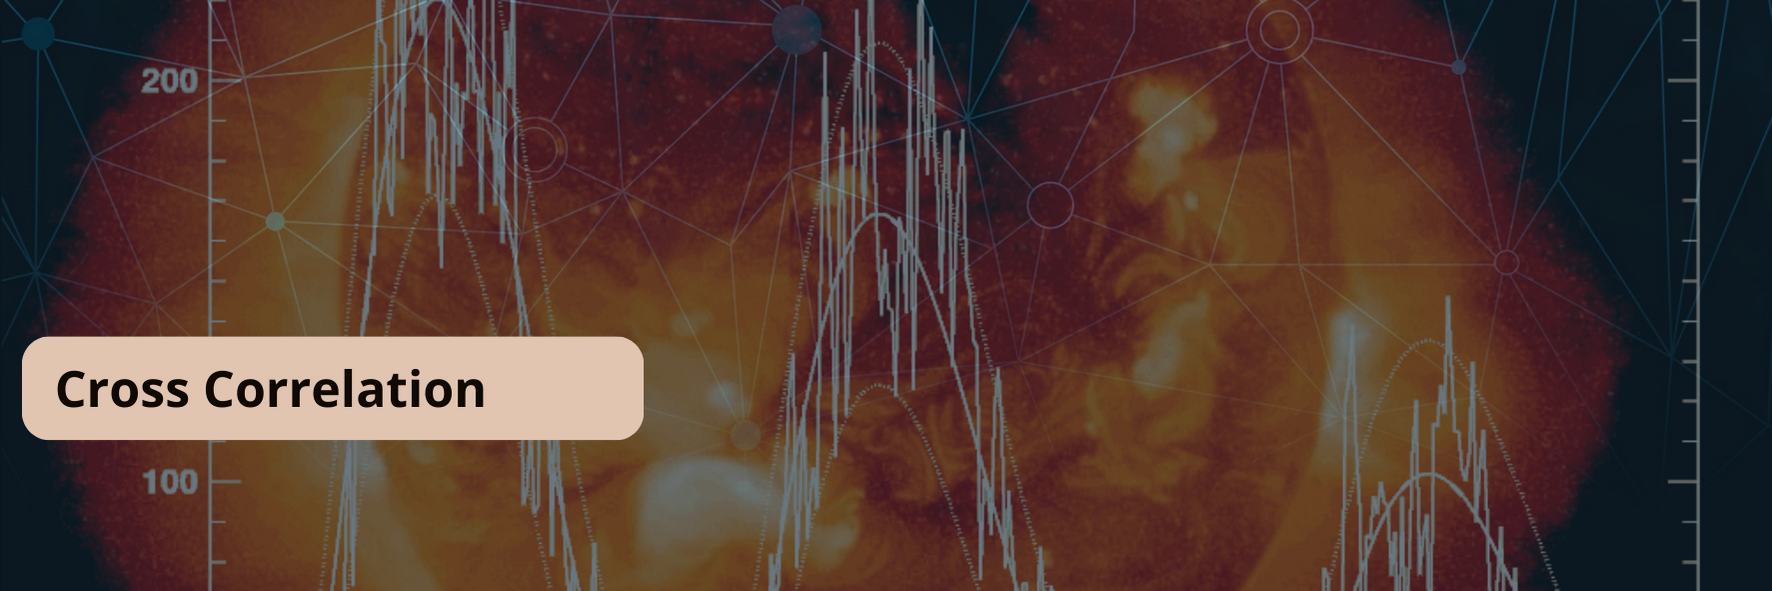

In [2]:
ruta_imagen_local = '/home/jennifer/Documentos/msc_tesis/P5.png'

Image(filename=ruta_imagen_local)

### Cálculo a mano de la correlación del Artículo

#### Parámetros solares + CRI Pierre Auger:
- Todo está normalizado

In [8]:
solar_par = pd.read_csv('solar_parameters/auger_solar_parameter_ZSCORE.csv')

#### Dataset Neutron Monitor (including Auger)

In [2]:
NMs = pd.read_csv('nm_data/CRI_auger_NM_6H_ZSCORE.csv')
NMs['date'] = pd.to_datetime(NMs['date'])
NMs.set_index('date', inplace=True)

In [3]:
len(NMs)

46748

In [4]:
NM_resampled = NMs.resample('1D').mean()

In [5]:
NM_resampled

oulu     auger    mexico   athenas      roma  \
date                                                                          
1990-01-01 00:00:00+00:00 -2.622201       NaN -1.713387       NaN       NaN   
1990-01-02 00:00:00+00:00 -2.499703       NaN -1.615266       NaN       NaN   
1990-01-03 00:00:00+00:00 -2.330906       NaN -1.539092       NaN       NaN   
1990-01-04 00:00:00+00:00 -2.302612       NaN -1.480920       NaN       NaN   
1990-01-05 00:00:00+00:00 -2.358878       NaN -1.421055       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2021-12-26 00:00:00+00:00  1.087474  0.388546  1.002329 -0.238852 -0.857666   
2021-12-27 00:00:00+00:00  1.087474  0.388546  1.029766 -0.087463 -0.850606   
2021-12-28 00:00:00+00:00  0.963047  0.388546  0.967576 -0.271893 -0.870125   
2021-12-29 00:00:00+00:00  0.977515  0.388546  0.921621 -0.167363 -0.886922   
2021-12-30 00:00:00+00:00  0.959188  0.388546  0.923800 -0.205210 -0.899184   

                             tsumeb     thule      sopo     newak  
date                                                               
1990-01-01 00:00:00+00:00 -2.761036 -2.807323 -2.317246 -2.683487  
1990-01-02 00:00:00+00:00 -2.715803 -2.803048 -2.227162 -2.525361  
1990-01-03 00:00:00+00:00 -2.759949 -2.679639 -2.157828 -2.400205  
1990-01-04 00:00:00+00:00 -2.685493 -2.604234 -2.046510 -2.366524  
1990-01-05 00:00:00+00:00 -2.771613 -2.567933 -2.081620 -2.309726  
...                             ...       ...       ...       ...  
2021-12-26 00:00:00+00:00  0.198220  1.174921  0.888763  0.938109  
2021-12-27 00:00:00+00:00  0.198220  1.244965  0.967299  0.998745  
2021-12-28 00:00:00+00:00  0.198220  1.133855  0.914826  0.902391  
2021-12-29 00:00:00+00:00  0.198220  1.193072  0.872468  0.877853  
2021-12-30 00:00:00+00:00  0.198220  1.169805  0.862116  0.887090  

[11687 rows x 9 columns]

In [6]:
NM_resampled.reset_index(inplace=True)
NMs = NM_resampled[['date','oulu','mexico','tsumeb','thule','sopo','newak']].copy()

In [9]:
# Asegurémonos de que las columnas 'date' sean de tipo datetime en ambos DataFrames
solar_par['date'] = pd.to_datetime(solar_par['date'])
NMs['date'] = pd.to_datetime(NMs['date']).dt.tz_localize(None)

#### Dataset con los datos solares + Pierre Auger + Oulu + Mexico

In [10]:
merged = pd.merge_asof(solar_par, NMs, on='date', direction='backward', tolerance=pd.Timedelta('1D'))

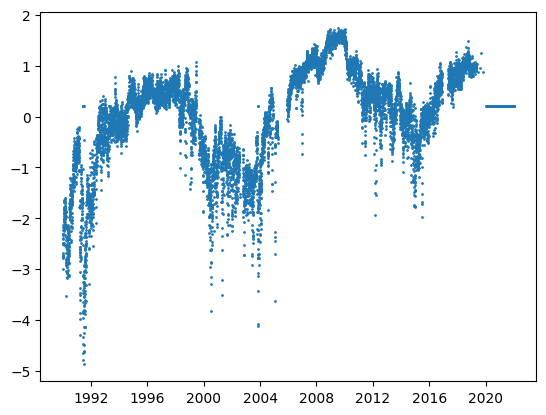

In [11]:
plt.scatter(merged['date'],merged['tsumeb'],s=1)

# Correlaciones con Oulu

In [12]:
##### FILTRADOOOOO
# Filtrando los datos para el rango de años DEL DETECTOR
start_date = '2006-01-01'
end_date = '2021-09-30'
oulu_corr = merged[(merged['date'] >= start_date) & (merged['date'] <= end_date)]
oulu_corr.set_index('date', inplace=True)
oulu_corr = oulu_corr.astype('float64') # 

## Prueba Negativo y Positivo
### Con mi código a mano

### Con la librería de Scipy

# Correlación Auger - Sunspots

In [13]:
merged

date  sunspots    solarw       CRI  oulu  mexico  tsumeb  thule  \
0     1818-01-01       NaN       NaN       NaN   NaN     NaN     NaN    NaN   
1     1818-01-02       NaN       NaN       NaN   NaN     NaN     NaN    NaN   
2     1818-01-03       NaN       NaN       NaN   NaN     NaN     NaN    NaN   
3     1818-01-04       NaN       NaN       NaN   NaN     NaN     NaN    NaN   
4     1818-01-05       NaN       NaN       NaN   NaN     NaN     NaN    NaN   
...          ...       ...       ...       ...   ...     ...     ...    ...   
75143 2023-09-26  2.118628  0.292529  0.168627   NaN     NaN     NaN    NaN   
75144 2023-09-27  2.354739  0.216029  0.168627   NaN     NaN     NaN    NaN   
75145 2023-09-28  0.444387 -0.450612  0.168627   NaN     NaN     NaN    NaN   
75146 2023-09-29  0.358529 -0.046256  0.168627   NaN     NaN     NaN    NaN   
75147 2023-09-30  0.744892 -0.253898  0.168627   NaN     NaN     NaN    NaN   

       sopo  newak  
0       NaN    NaN  
1       NaN    NaN  
2       NaN    NaN  
3       NaN    NaN  
4       NaN    NaN  
...     ...    ...  
75143   NaN    NaN  
75144   NaN    NaN  
75145   NaN    NaN  
75146   NaN    NaN  
75147   NaN    NaN  

[75148 rows x 10 columns]

In [14]:
##### FILTRADOOOOO
# Filtrando los datos para el rango de años de enero de 2006 a septiembre de 2021
start_date = '2006-01-01'
end_date = '2021-09-30'
df = merged[(merged['date'] >= start_date) & (merged['date'] <= end_date)]
df.set_index('date', inplace=True)
df = df.astype('float64') # 

# Auger

# Oulu

# México

# Tsumeb

In [15]:
df.reset_index(inplace=True)

# Auger - Tsumeb

In [15]:
porcentajes = abs(df['tsumeb'] - df['CRI']) / ((df['tsumeb'] + df['CRI']) / 2) * 100
media = np.mean(porcentajes)
media

-228.25306392890903

# Auger - Mexico

In [17]:
porcentajes = abs(df['mexico'] - df['CRI']) / ((df['mexico'] + df['CRI']) / 2) * 100
media = np.mean(porcentajes)
media

30.920304154356742

# Auger - Oulu

In [18]:
porcentajes = abs(df['oulu'] - df['CRI']) / ((df['oulu'] + df['CRI']) / 2) * 100
media = np.mean(porcentajes)
media

32.821608606583865

In [19]:
# SUPERPUESTOS MANCHAS Y SOLARWIND

In [16]:
df

sunspots    solarw       CRI      oulu    mexico    tsumeb  \
date                                                                     
2006-01-01 -1.165460  0.325315 -2.346513 -0.382828 -0.319319 -0.094403   
2006-01-02 -1.058137  0.073958 -2.410037 -0.254864 -0.147158  0.019012   
2006-01-03 -1.143996 -0.133684 -2.138790 -0.166125 -0.075400  0.013116   
2006-01-04 -1.315713 -0.625469 -2.255055 -0.089282 -0.067480  0.038717   
2006-01-05 -1.079602 -1.040754 -2.776479 -0.147155 -0.094182  0.008421   
...              ...       ...       ...       ...       ...       ...   
2021-09-26  0.938074 -0.242970 -0.577015  0.893277  0.781755  0.198220   
2021-09-27  0.422922 -0.527112 -0.323018  0.853731  0.789924  0.198220   
2021-09-28  0.809286  0.565743 -0.024679  0.854374  0.827886  0.198220   
2021-09-29  1.302972 -0.395970 -0.121458  0.912890  0.857178  0.198220   
2021-09-30 -0.070764 -0.242970  0.168627  0.981373  0.885278  0.198220   

               thule      sopo     newak  
date                                      
2006-01-01 -0.240361 -0.005413  0.013276  
2006-01-02 -0.116356 -0.005413  0.125310  
2006-01-03 -0.047153 -0.005413  0.217684  
2006-01-04  0.057405 -0.005413  0.215836  
2006-01-05 -0.064533 -0.005413  0.211573  
...              ...       ...       ...  
2021-09-26  1.091562  0.754605  0.762077  
2021-09-27  1.074253  0.801746  0.772262  
2021-09-28  1.045871  0.790764  0.809306  
2021-09-29  1.107785  0.817019  0.879558  
2021-09-30  1.118437  0.832173  0.896659  

[5752 rows x 9 columns]

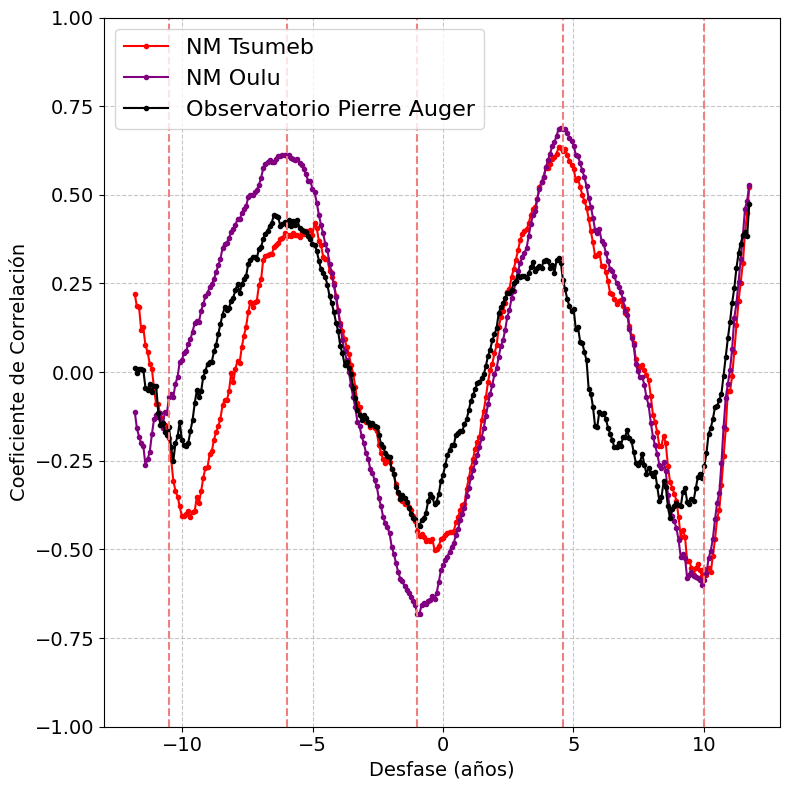

In [30]:
# Define un rango de desfases
lags = np.arange(-30*12*12, 30*12*12, 30)  # Desfases de -12 años a 12 años (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(df,'CRI', 'sunspots',  lags)
correlations_tsumeb = calculate_correlations(df,  'tsumeb','sunspots', lags)
correlations_oulu = calculate_correlations(df, 'oulu', 'sunspots', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 365.25

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_years, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_years, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y
plt.legend(fontsize=16)

# Añadir líneas verticales en 5.5 y 11 años
plt.axvline(x=4.6, color='lightcoral', linestyle='--', label='')
plt.axvline(x=10, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-6, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-10.5, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-0.34, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-1, color='lightcoral', linestyle='--', label='')


# zona de correlación alta
#plt.axhspan(-0.50, -1.00, facecolor='green', alpha=0.2)
#plt.text(0, 0.40, 'correlación fuerte', color='black', fontsize=10, ha='center', va='center')
# zona de correlación moderada
#plt.axhspan(-0.30, -0.50, facecolor='cyan', alpha=0.2)
#plt.text(0, 0.40, 'correlación moderada', color='black', fontsize=10, ha='center', va='center')
# zona de correlación baja
#plt.axhspan(-0.10, -0.30, facecolor='red', alpha=0.2)
#plt.text(0, 0.40, 'correlación baja', color='black', fontsize=10, ha='center', va='center')


# Añadir etiquetas para los años en las líneas verticales
#plt.text(5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(-5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(-11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')

#plt.savefig('CORRELACION_CRIvsSSN_NM_ZSCORE.png')
plt.tight_layout()
plt.show()


###### GRAFICAR EN LA ESCALA DE MESE

#### HACER PARA EL ARTÍCULO DE ROSS

In [31]:
pwd

'/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis'

In [ ]:
### MUESTREO MENSUAL::::

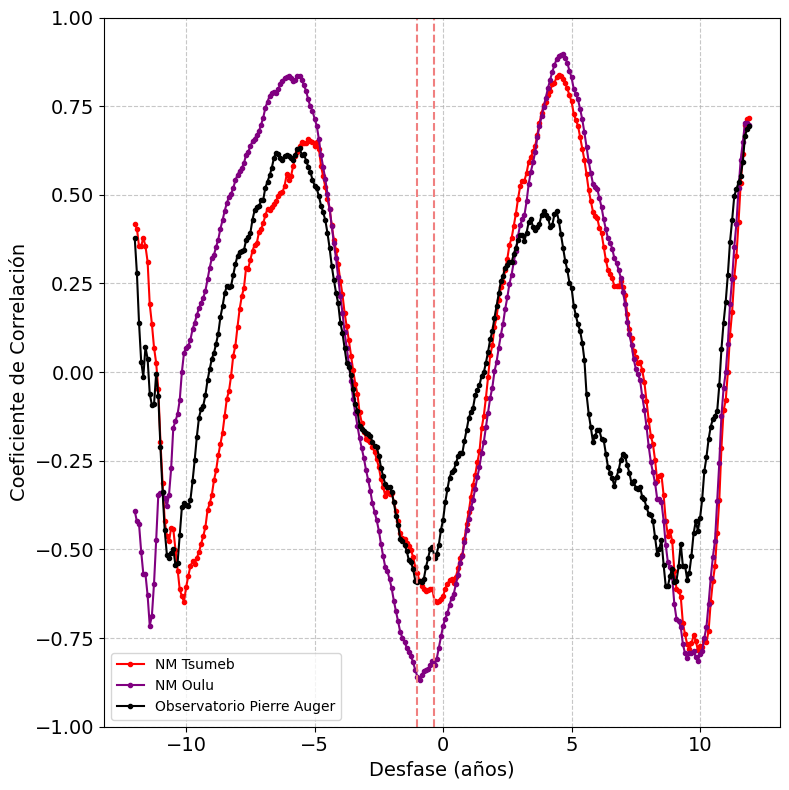

In [21]:
import pandas as pd

# Resamplea el DataFrame a una frecuencia mensual
df_monthly = df.resample('M').mean()

# Define un rango de desfases
lags = np.arange(-12*12, 12*12, 1)  # Desfases de -12 años a 12 años (en meses)

# Calcula las correlaciones para los datos muestreados en meses
correlations_CRI_monthly = calculate_correlations(df_monthly, 'CRI', 'sunspots', lags)
correlations_tsumeb_monthly = calculate_correlations(df_monthly, 'tsumeb', 'sunspots', lags)
correlations_oulu_monthly = calculate_correlations(df_monthly, 'oulu', 'sunspots', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 12

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))
plt.plot(lags_years, correlations_tsumeb_monthly, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_years, correlations_oulu_monthly, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_years, correlations_CRI_monthly, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')

plt.axvline(x=-0.34, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-1, color='lightcoral', linestyle='--', label='')

plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=16)
plt.legend()
#plt.savefig('CORRELACION_CRIvsSSN_NM_ZSCORE.png')
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


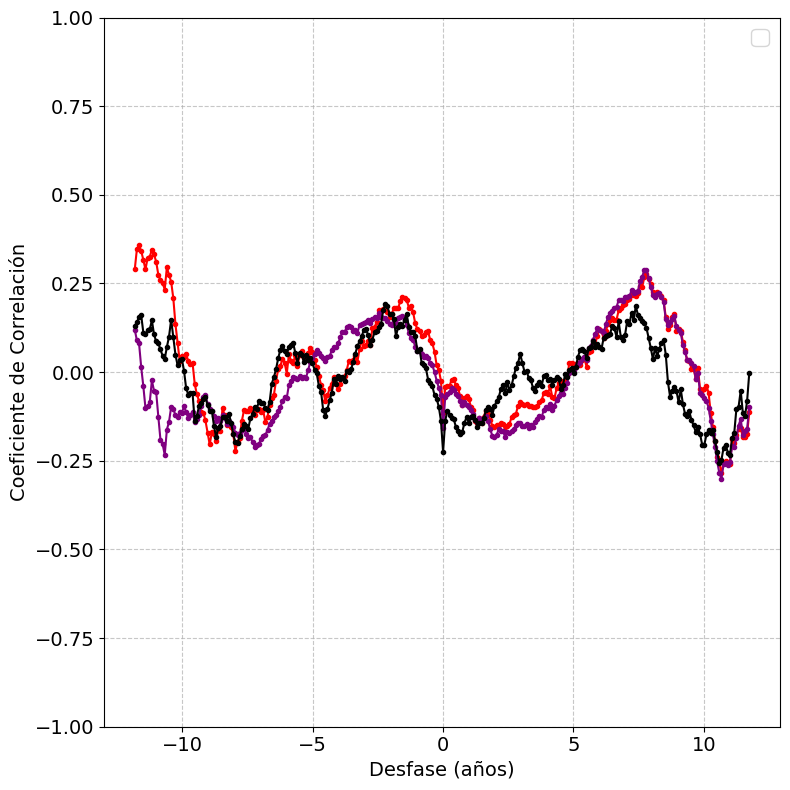

In [27]:
# Define un rango de desfases
lags = np.arange(-30*12*12, 30*12*12, 30)  # Desfases de -12 años a 12 años (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(df,'CRI', 'solarw',  lags)
correlations_tsumeb = calculate_correlations(df,  'tsumeb','solarw', lags)
correlations_oulu = calculate_correlations(df, 'oulu', 'solarw', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 365.25

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations_tsumeb, marker='.', linestyle='-', color='red', label='')
plt.plot(lags_years, correlations_oulu, marker='.', linestyle='-', color='purple', label='')
plt.plot(lags_years, correlations_CRI, marker='.', linestyle='-', color='black', label='')
plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y

# Añadir líneas verticales en 5.5 y 11 años
#plt.axvline(x=5.5, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=11, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-5.5, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-11, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-0.34, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-1, color='lightcoral', linestyle='--', label='')


# zona de correlación alta
#plt.axhspan(-0.50, -1.00, facecolor='green', alpha=0.2)
#plt.text(0, 0.40, 'correlación fuerte', color='black', fontsize=10, ha='center', va='center')
# zona de correlación moderada
#plt.axhspan(-0.30, -0.50, facecolor='cyan', alpha=0.2)
#plt.text(0, 0.40, 'correlación moderada', color='black', fontsize=10, ha='center', va='center')
# zona de correlación baja
#plt.axhspan(-0.10, -0.30, facecolor='red', alpha=0.2)
#plt.text(0, 0.40, 'correlación baja', color='black', fontsize=10, ha='center', va='center')


# Añadir etiquetas para los años en las líneas verticales
#plt.text(5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(-5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
#plt.text(-11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')

plt.savefig('CORRELACION_CRIvsSW_ZSCORE.png')
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()


###### GRAFICAR EN LA ESCALA DE MESE

#### HACER PARA EL ARTÍCULO DE ROSS

In [22]:
### REPETICIÓN DE LA METODOLOGÍA DE ROSS

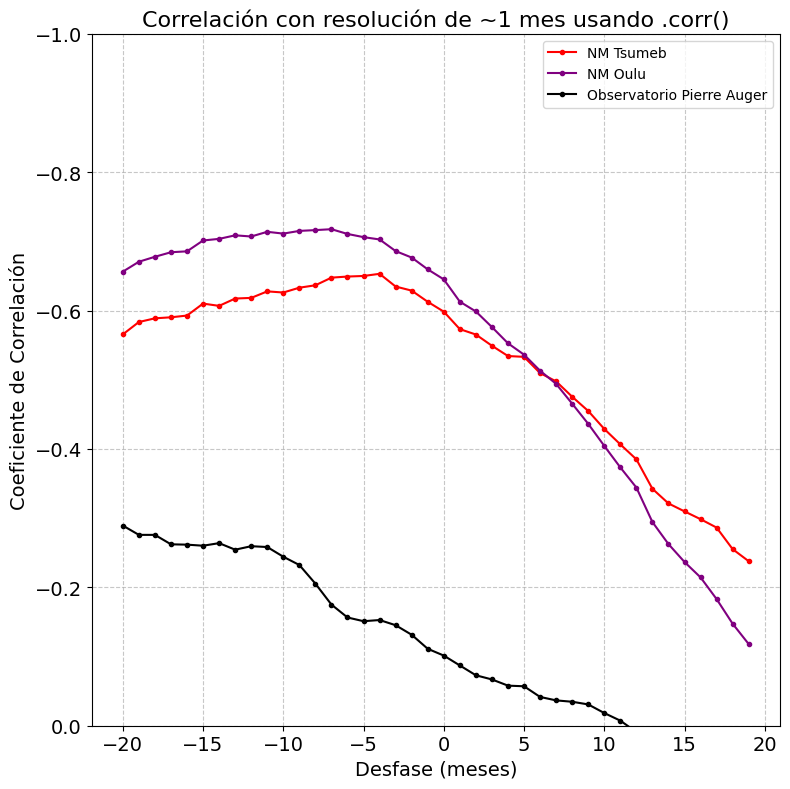

In [23]:
#
# Define un rango de desfases
lags = np.arange(-20*30, 20*30, 30)  # Desfases de -20 meses a 20 meses (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(merged,  'CRI', 'sunspots',lags)
correlations_tsumeb = calculate_correlations(merged, 'tsumeb' ,'sunspots', lags)
correlations_oulu = calculate_correlations(merged,'oulu', 'sunspots',  lags)

# Convierte los desfases a meses para la gráfica
lags_months = lags / 30

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  
plt.plot(lags_months, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_months, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_months, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.xlabel('Desfase (meses)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('Correlación con resolución de ~1 mes usando .corr()', fontsize=16)
plt.ylim(0, -1)  # Invierte el eje vertical
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

# Añadir líneas verticales en 5.5 y 11 años
#plt.axvline(x=5.5*12, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=11*12, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-5.5*12, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-11*12, color='lightcoral', linestyle='--', label='')

# zona de correlación alta
#plt.axhspan(0.50, 1.00, facecolor='green', alpha=0.2)
# zona de correlación moderada
#plt.axhspan(0.30, 0.50, facecolor='cyan', alpha=0.2)
# zona de correlación baja
#plt.axhspan(0.10, 0.30, facecolor='red', alpha=0.2)

# Añadir etiquetas para los años en las líneas verticales
#plt.text(5.5*12, -0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='top')
#plt.text(11*12, -0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='top')
#plt.text(-5.5*12, -0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='top')
#plt.text(-11*12, -0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='top')

plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
#### DATAFRAME REMUESTREADO A UN MES

In [25]:
merged
merged.set_index('date',inplace=True)

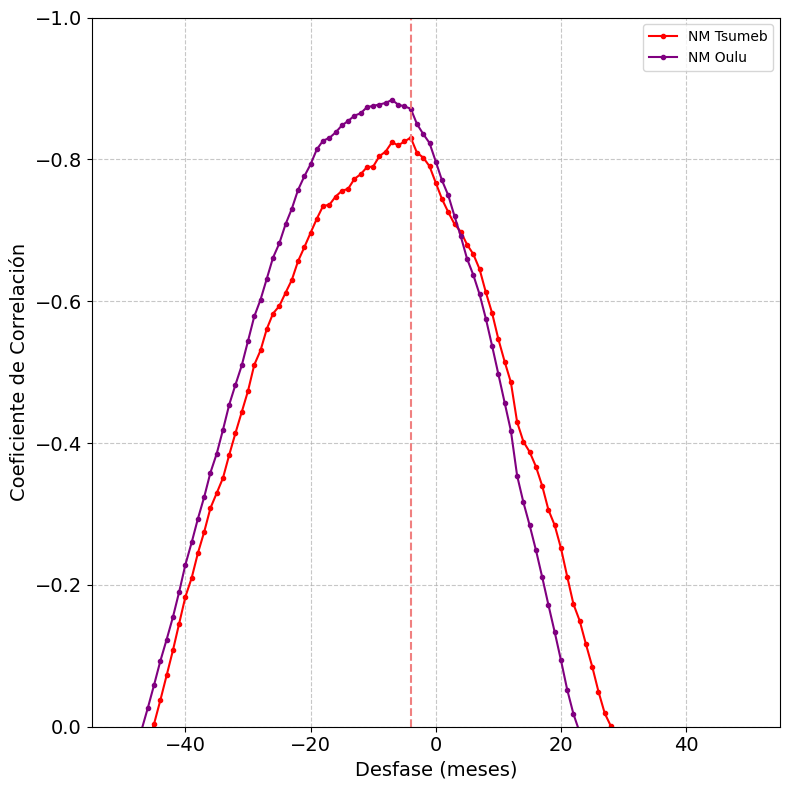

In [26]:
# Re-muestrea el dataframe a una resolución mensual
merged_monthly = merged.resample('M').mean()

# Define un rango de desfases
lags = np.arange(-50, 51, 1)  # Desfases de -50 meses a 50 meses

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(merged_monthly, 'CRI', 'sunspots', lags)
correlations_tsumeb = calculate_correlations(merged_monthly, 'tsumeb', 'sunspots', lags)
correlations_oulu = calculate_correlations(merged_monthly, 'oulu', 'sunspots', lags)

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  
plt.plot(lags, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
#plt.plot(lags, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.axvline(x=-4, color='lightcoral', linestyle='--', label='')

plt.xlabel('Desfase (meses)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(0, -1)  # Invierte el eje vertical
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


In [27]:
df
df.set_index('date',inplace=True)

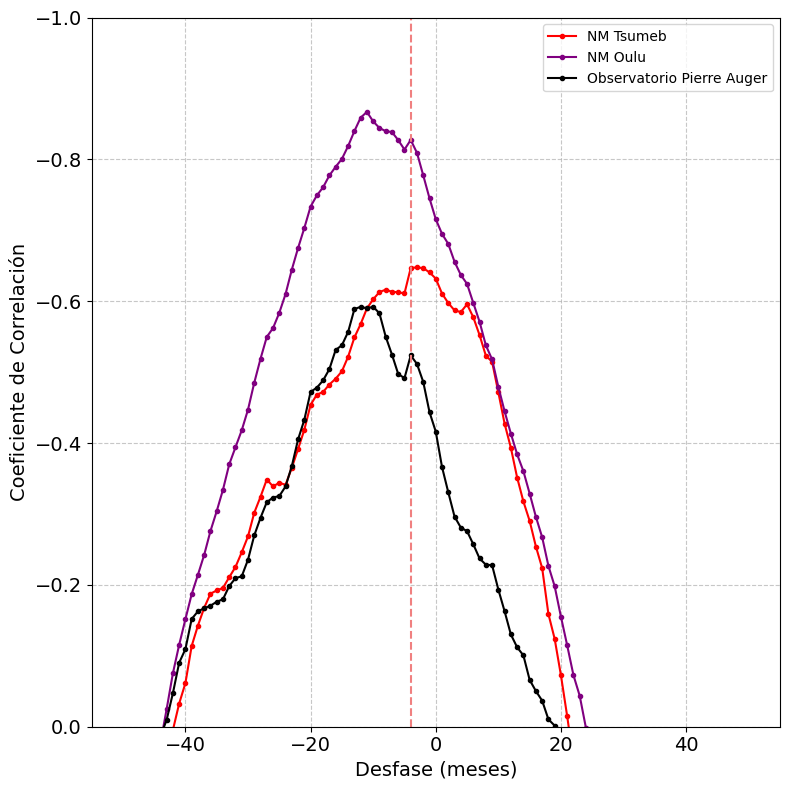

In [28]:
# Re-muestrea el dataframe a una resolución mensual
df_monthly = df.resample('M').mean()

# Define un rango de desfases
lags = np.arange(-50, 51, 1)  # Desfases de -50 meses a 50 meses

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(df_monthly, 'CRI', 'sunspots', lags)
correlations_tsumeb = calculate_correlations(df_monthly, 'tsumeb', 'sunspots', lags)
correlations_oulu = calculate_correlations(df_monthly, 'oulu', 'sunspots', lags)

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  
plt.plot(lags, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.axvline(x=-4, color='lightcoral', linestyle='--', label='')

plt.xlabel('Desfase (meses)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(0, -1)  # Invierte el eje vertical
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
### MÉTODO DE ROSS Y USOSKIN 1998

In [30]:
########### NUEVA CORRELACIÓN DE SPEARMAN 2 DE ABRIL VAMOS A VER COMO NOS VA

# DE CERO CON MI CEREBRITO

In [36]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Define una función para calcular correlaciones con desfases
def calculate_max_correlations(df, column1, column2, lags, window):
    max_correlations = []
    max_lags = []
    for t in range(window // 2, len(df) - window // 2):
        df_window = df.iloc[t - window // 2 : t + window // 2]
        max_corr = -np.inf
        max_lag = None
        for lag in lags:
            shifted = df_window[column1].shift(lag)
            correlation, _ = spearmanr(shifted, df_window[column2])
            if correlation > max_corr:
                max_corr = correlation
                max_lag = lag
        max_correlations.append(max_corr)
        max_lags.append(max_lag)
    return max_correlations, max_lags

In [32]:
# DARAFRAME PARA SOLO EL CICLO SOLAR 24
df_monthly

sunspots    solarw       CRI      oulu    mexico    tsumeb  \
date                                                                     
2006-01-31  0.059985  0.263640  0.311520  0.566560  0.532820  0.570051   
2006-02-28  0.062369  0.247399  0.333916  0.587131  0.559970  0.598562   
2006-03-31  0.073037  0.287973  0.372981  0.607570  0.569914  0.609092   
2006-04-30  0.093082  0.286132  0.400276  0.610073  0.571982  0.617104   
2006-05-31  0.077703  0.277300  0.411545  0.617689  0.567527  0.622866   
...              ...       ...       ...       ...       ...       ...   
2021-05-31  0.099479  0.234568  0.501407  0.676934  0.638440  0.562495   
2021-06-30  0.109504  0.240082  0.488472  0.673126  0.632536  0.562495   
2021-07-31  0.178468  0.245201  0.455177  0.665294  0.620662  0.562495   
2021-08-31  0.152837  0.220868  0.433318  0.672950  0.625905  0.562495   
2021-09-30  0.182460  0.234321  0.442050  0.669654  0.618923  0.562495   

               thule      sopo     newak  
date                                      
2006-01-31  0.636352       NaN  0.750304  
2006-02-28  0.666353       NaN  0.785110  
2006-03-31  0.683068       NaN  0.804604  
2006-04-30  0.687657       NaN  0.807232  
2006-05-31  0.691487       NaN  0.810232  
...              ...       ...       ...  
2021-05-31  0.772725  0.627877  0.832408  
2021-06-30  0.774945  0.630101  0.825187  
2021-07-31  0.761013  0.620011  0.814974  
2021-08-31  0.769380  0.628528  0.821335  
2021-09-30  0.771003  0.622003  0.817133  

[189 rows x 9 columns]

In [33]:
df_monthly.isnull().sum()

sunspots     0
solarw       0
CRI          0
oulu         0
mexico       0
tsumeb       8
thule        0
sopo        49
newak        0
dtype: int64

In [34]:
constant_columns = df_monthly.columns[df_monthly.std() == 0].tolist()
constant_columns
constant_columns = df_monthly.columns[df_monthly.nunique() <= 1].tolist()
print("Columnas con valores constantes:", constant_columns)


Columnas con valores constantes: []


### ALGORITMO MANUAL QUE REALIZA EL CÁLCULO DE LA CORRELACIÓN DE SPEARMAN

In [37]:
import pandas as pd
from scipy.stats import spearmanr

#VOY A HACERLO DE TAL FORMA QUE EXTRAIGO DE UNA VEZ LAS SERIES DE TIEMPO ANTES DE
def corr_spearman(serie_shifted,serie_normal):
 
    # Calcular los rangos de cada serie
    rango_serie1 = serie_shifted.rank()
    rango_serie2 = serie_normal.rank()
    
    # Calcular la diferencia de rangos y elevar al cuadrado
    diferencia_cuadrada = (rango_serie1 - rango_serie2) ** 2
    
    # Sumar las diferencias al cuadrado
    suma_diferencias_cuadradas = diferencia_cuadrada.sum()
    
    # Número de observaciones
    n = len(serie_shifted)
    
    # Fórmula de correlación de Spearman
    correlacion_spearman = 1 - ((6 * suma_diferencias_cuadradas) / (n * (n**2 - 1)))
    
    # También puedes usar la función spearmanr de scipy para verificar el resultado
    coeficiente, p_valor = spearmanr(serie_shifted, serie_normal)
    
    return correlacion_spearman

# Ejemplo de uso:
# df es tu DataFrame que ya contiene las series de tiempo en las columnas 'columna1' y 'columna2'
# resultado = calcular_correlacion_spearman(df, 'columna1', 'columna2')
# print(resultado)


# FORMA 1: CALCULANDO LA CORRELACIÓN MÁXIMA PARA CADA LAG EN EL TOTAL DE VENTANAS

In [38]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
#
# Define una función para calcular correlaciones con desfases
def calculate_max_correlations_LAG(df, column1, column2, lags, window):
    correlation_ar = []
    lags_ar = []
    first_iteration = True  # Variable para rastrear la primera iteración
    for t in range(window // 2, len(df) - window // 2):
        counter = 0
        df_window = df.iloc[t - window // 2 : t + window // 2]
        max_corr = -np.inf
        max_lag = None
        for lag in lags:
            shifted = df_window[column1].shift(lag)
            correlation = corr_spearman(shifted, df_window[column2])  # Corrige esta línea
            if first_iteration:
                correlation_ar.append(correlation)
                lags_ar.append(lag)
            else:
                # Comparamos con los valores almacenados en diferentes posiciones
                if correlation > correlation_ar[counter]:
                    correlation_ar[counter] = correlation
                else:
                    continue
                counter += 1            
        first_iteration = False
    return correlation_ar, lags_ar

# FORMA 2: CALCULANDO LA CORRELACIÓN MÁXIMA PARA CADA VENTANA Y EL LAG EN EL QUE ESTO OCURRE

In [39]:
def calculate_max_correlations_WINDOW(df, column1, column2, lags, window):
    max_correlations = []
    max_lags = []
    months = []
    for t in range(window // 2, len(df) - window // 2):
        df_window = df.iloc[t - window // 2 : t + window // 2]
        max_corr = -np.inf
        max_lag = None
        for lag in lags:
            shifted = df_window[column1].shift(lag)
            #correlation = corr_spearman(shifted, df_window[column2]) 
            correlation = df_window[column2].corr(shifted)
            if correlation > max_corr:
                max_corr = correlation
                max_lag = lag
        max_correlations.append(max_corr)
        max_lags.append(max_lag)
    return max_correlations, max_lags

In [43]:
# Define un rango de desfases
lags = np.arange(-25, 26, 1)  # Desfases de -50 meses a 50 meses

# Define la ventana temporal
T = 50  # 50 meses

# Calcula las correlaciones
correlations_CRI, lags_CRI = calculate_max_correlations_LAG(df_monthly, 'thule', 'sunspots', lags, T)
correlations_tsumeb, lags_tsumeb = calculate_max_correlations_LAG(df_monthly, 'newak', 'sunspots', lags, T)
correlations_oulu, lags_oulu = calculate_max_correlations_LAG(df_monthly, 'oulu', 'sunspots', lags, T)


In [44]:
#len(lags_oulu)
len(correlations_oulu)
correlations_oulu, lags_oulu

([0.931188475390156,
  0.9202881152460984,
  0.843313325330132,
  0.8198799519807923,
  0.7699399759903962,
  0.7493397358943578,
  0.7322448979591837,
  0.7072268907563025,
  0.6991596638655462,
  0.6515726290516206,
  0.5746938775510204,
  0.525234093637455,
  0.6017286914765907,
  0.7056422569027612,
  0.7106362545018008,
  0.7224489795918367,
  0.7236494597839136,
  0.735702280912365,
  0.7185594237695079,
  0.7406482593037215,
  0.7234573829531813,
  0.7222088835534214,
  0.6561824729891956,
  0.6248259303721488,
  0.5999519807923169,
  0.5701800720288115,
  0.5954381752701081,
  0.6343337334933974,
  0.6424969987995198,
  0.6250660264105643,
  0.6246818727490997,
  0.6318847539015606,
  0.6265546218487394,
  0.6502280912364946,
  0.6479231692677071,
  0.6492677070828332,
  0.6089315726290516,
  0.6370708283313326,
  0.6950300120048019,
  0.663577430972389,
  0.6810564225690277,
  0.6981992797118848,
  0.7431452581032413,
  0.7454501800720288,
  0.7667707082833133,
  0.75625450180

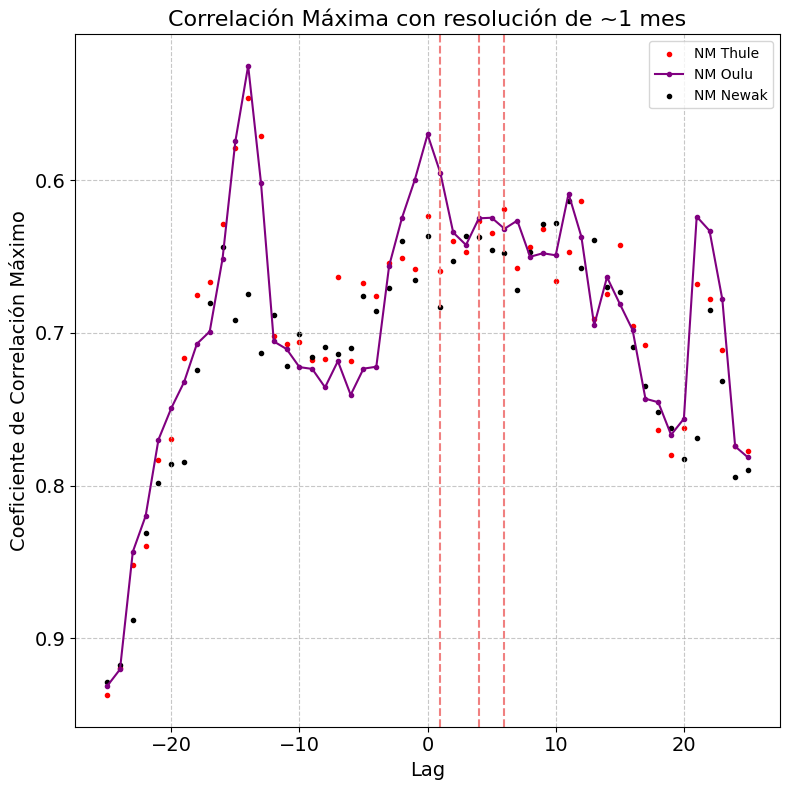

In [47]:
# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  
plt.scatter(lags_tsumeb, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Thule')
plt.plot(lags_oulu, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.scatter(lags_CRI, correlations_CRI, marker='.', linestyle='-', color='black', label='NM Newak')
#plt.axvline(x=-5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=6, color='lightcoral', linestyle='--', label='')
plt.axvline(x=4, color='lightcoral', linestyle='--', label='')
plt.axvline(x=1, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=3, color='lightcoral', linestyle='--', label='')
#plt.axvline(x=-2, color='lightcoral', linestyle='--', label='')

plt.xlabel('Lag', fontsize=14)
plt.ylabel('Coeficiente de Correlación Máximo', fontsize=14)
plt.title('Correlación Máxima con resolución de ~1 mes', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.legend(fontsize=14)
plt.legend()
plt.gca().invert_yaxis()  # Invierte el eje y
plt.tight_layout()
plt.show()

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Define una función para calcular correlaciones con desfases
def calculate_max_correlation(df, column1, column2, lags, window):
    max_correlation = -np.inf
    max_lag = None
    for lag in lags:
        correlations = []
        for t in range(window // 2, len(df) - window // 2):
            df_window = df.iloc[t - window // 2 : t + window // 2]
            shifted = df_window[column1].shift(lag)
            correlation, _ = spearmanr(shifted, df_window[column2])
            correlations.append(correlation)
        avg_corr = np.nanmean(correlations)
        if avg_corr > max_correlation:
            max_correlation = avg_corr
            max_lag = lag
    return max_correlation, max_lag

# Define un rango de desfases
lags = np.arange(-50, 51, 1)  # Desfases de -50 meses a 50 meses

# Define la ventana temporal
T = 50  # 50 meses

# Calcula las correlaciones
max_correlation_CRI, max_lag_CRI = calculate_max_correlation(merged_monthly, 'CRI', 'sunspots', lags, T)
max_correlation_tsumeb, max_lag_tsumeb = calculate_max_correlation(merged_monthly, 'tsumeb', 'sunspots', lags, T)
max_correlation_oulu, max_lag_oulu = calculate_max_correlation(merged_monthly, 'oulu', 'sunspots', lags, T)

# Imprime las correlaciones máximas y los desfases correspondientes
print('NM Tsumeb: max correlation =', max_correlation_tsumeb, 'at lag =', max_lag_tsumeb)
print('NM Oulu: max correlation =', max_correlation_oulu, 'at lag =', max_lag_oulu)
print('Observatorio Pierre Auger: max correlation =', max_correlation_CRI, 'at lag =', max_lag_CRI)


/tmp/ipykernel_8319/1437373100.py:15: RuntimeWarning: Mean of empty slice
  avg_corr = np.nanmean(correlations)


NM Tsumeb: max correlation = -0.5585563569385961 at lag = 0
NM Oulu: max correlation = -0.6173164965941532 at lag = 0
Observatorio Pierre Auger: max correlation = -0.37694123350605746 at lag = 0


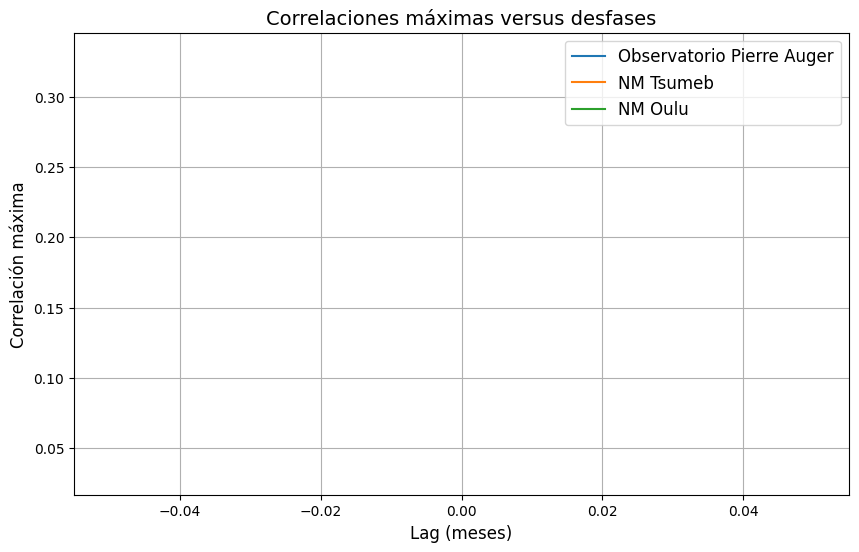

In [61]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags, window):
    correlations = {lag: [] for lag in lags}
    for lag in lags:
        for t in range(window // 2, len(df) - window // 2):
            df_window = df.iloc[t - window // 2 : t + window // 2]
            shifted = df_window[column1].shift(lag)
            correlation, _ = spearmanr(shifted, df_window[column2])
            if np.isnan(correlation):
                continue
            correlations[lag].append(correlation)
    return correlations

# Define un rango de desfases
lags = np.arange(-50, 51, 1)  # Desfases de -50 meses a 50 meses

# Define la ventana temporal
T = 50  # 50 meses

# Calcula las correlaciones
correlations_CRI = calculate_correlations(df_monthly, 'CRI', 'sunspots', lags, T)
correlations_tsumeb = calculate_correlations(df_monthly, 'tsumeb', 'sunspots', lags, T)
correlations_oulu = calculate_correlations(df_monthly, 'oulu', 'sunspots', lags, T)

# Calcula las correlaciones máximas
max_correlations_CRI = {lag: max(correlations) if correlations else np.nan for lag, correlations in correlations_CRI.items()}
max_correlations_tsumeb = {lag: max(correlations) if correlations else np.nan for lag, correlations in correlations_tsumeb.items()}
max_correlations_oulu = {lag: max(correlations) if correlations else np.nan for lag, correlations in correlations_oulu.items()}

# Grafica las correlaciones máximas versus los desfases
plt.figure(figsize=(10, 6))
plt.plot(lgist(max_correlations_CRI.keys()), list(max_correlations_CRI.values()), label='Observatorio Pierre Auger')
plt.plot(list(max_correlations_tsumeb.keys()), list(max_correlations_tsumeb.values()), label='NM Tsumeb')
plt.plot(list(max_correlations_oulu.keys()), list(max_correlations_oulu.values()), label='NM Oulu')
plt.legend()
plt.xlabel('Lag (meses)')
plt.ylabel('Correlación máxima')
plt.title('Correlaciones máximas versus desfases')
plt.grid(True)
plt.show()


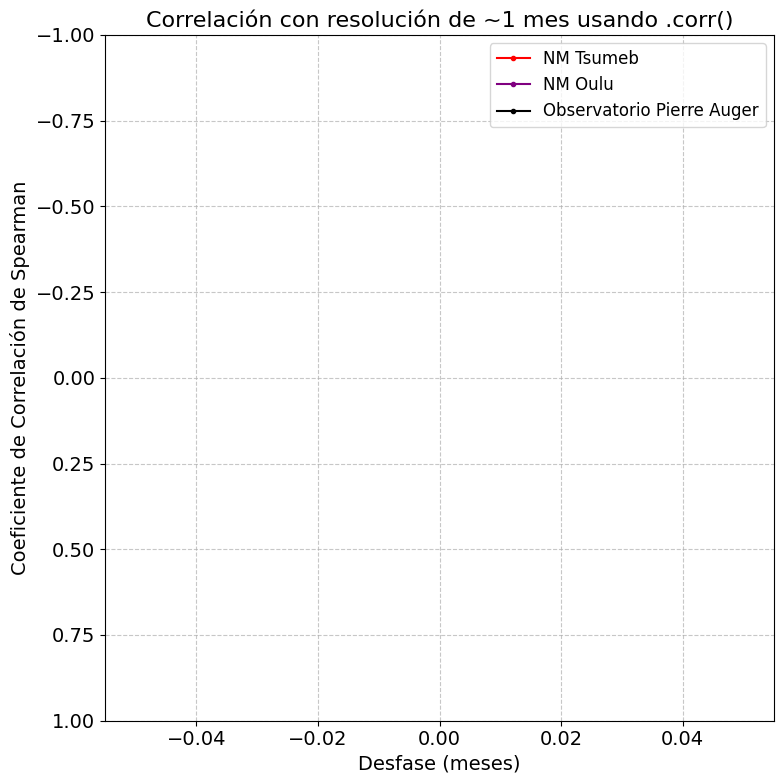

In [47]:
import scipy.stats

# Define un rango de desfases
lags = np.arange(-20*30, 20*30, 30)  # Desfases de -20 meses a 20 meses (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation, _ = scipy.stats.spearmanr(df[column2], shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(merged, 'sunspots', 'CRI', lags)
correlations_tsumeb = calculate_correlations(merged, 'sunspots', 'tsumeb', lags)
correlations_oulu = calculate_correlations(merged, 'sunspots', 'oulu', lags)

# Convierte los desfases a meses para la gráfica
lags_months = lags / 30

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  
plt.plot(lags_months, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_months, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_months, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.xlabel('Desfase (meses)', fontsize=14)
plt.ylabel('Coeficiente de Correlación de Spearman', fontsize=14)
plt.title('Correlación con resolución de ~1 mes usando .corr()', fontsize=16)
plt.ylim(1, -1)  # Invierte el eje vertical
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  


plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()


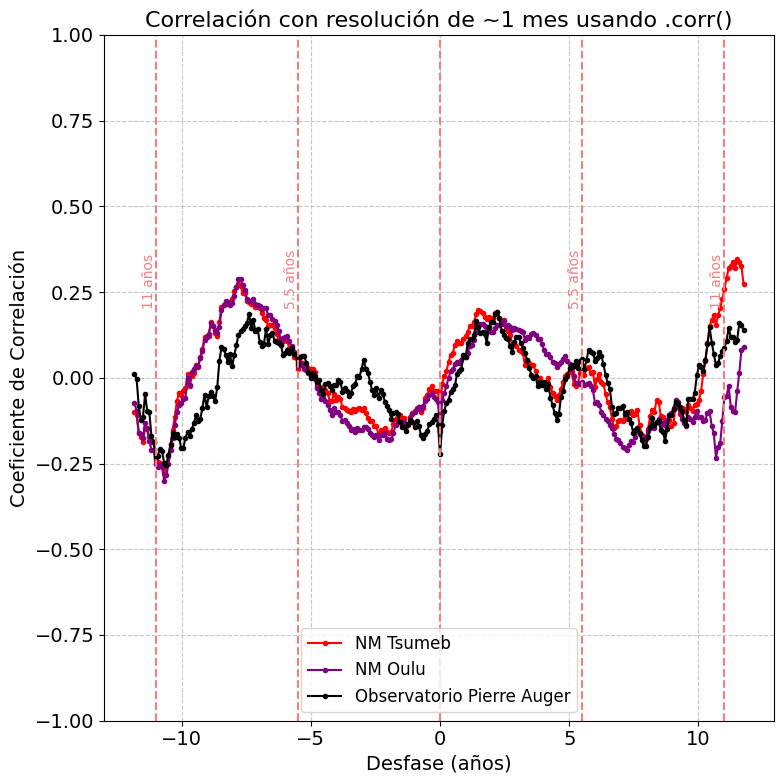

In [44]:
# Define un rango de desfases
lags = np.arange(-30*12*12, 30*12*12, 30)  # Desfases de -12 años a 12 años (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(df, 'solarw', 'CRI', lags)
correlations_tsumeb = calculate_correlations(df, 'solarw', 'tsumeb', lags)
correlations_oulu = calculate_correlations(df, 'solarw', 'oulu', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 365.25

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_years, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_years, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('Correlación con resolución de ~1 mes usando .corr()', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y

# Añadir líneas verticales en 5.5 y 11 años
plt.axvline(x=5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=0, color='lightcoral', linestyle='--', label='')

# Añadir etiquetas para los años en las líneas verticales
plt.text(5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')


plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# PARA LOS DATOS ENTEROS DE OULU Y TSUMEB

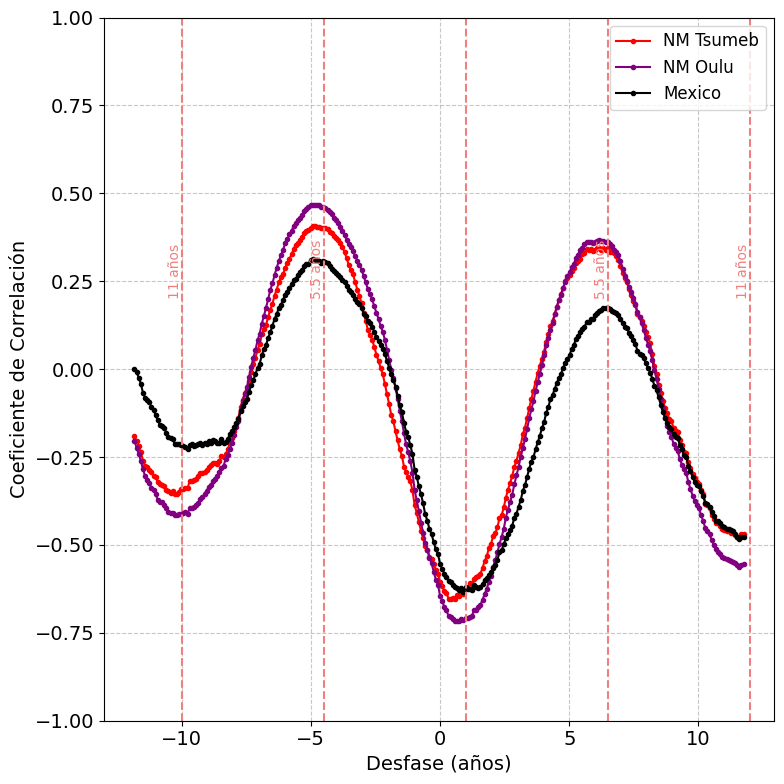

In [66]:
# Define un rango de desfases
lags = np.arange(-30*12*12, 30*12*12, 30)  # Desfases de -12 años a 12 años (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
correlations_CRI = calculate_correlations(merged, 'sunspots', 'mexico', lags)
correlations_tsumeb = calculate_correlations(merged, 'sunspots', 'tsumeb', lags)
correlations_oulu = calculate_correlations(merged, 'sunspots', 'oulu', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 365.25

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_years, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
plt.plot(lags_years, correlations_CRI, marker='.', linestyle='-', color='black', label='Mexico')
plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y

# Añadir líneas verticales en 5.5 y 11 años
plt.axvline(x=6.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=12, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-4.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-10, color='lightcoral', linestyle='--', label='')
plt.axvline(x=1, color='lightcoral', linestyle='--', label='')

# Añadir etiquetas para los años en las líneas verticales
plt.text(6.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(12, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-4.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-10, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.savefig('corr_NMs_ALLYEARS.png')

plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

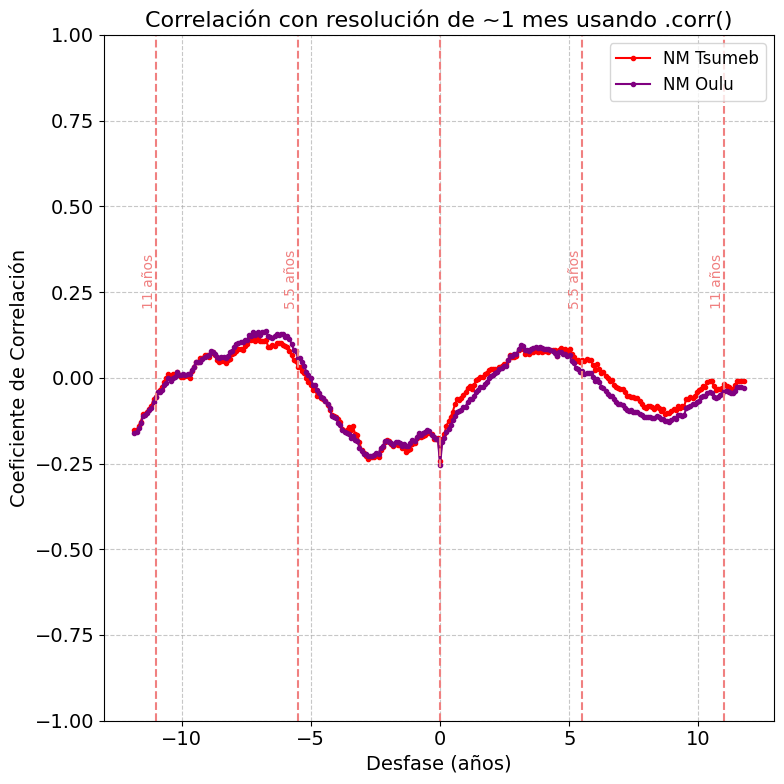

In [48]:
# Define un rango de desfases
lags = np.arange(-30*12*12, 30*12*12, 30)  # Desfases de -12 años a 12 años (en días)

# Define una función para calcular correlaciones con desfases
def calculate_correlations(df, column1, column2, lags):
    correlations = []
    for lag in lags:
        shifted = df[column1].shift(lag)
        correlation = df[column2].corr(shifted)
        correlations.append(correlation)
    return correlations

# Calcula las correlaciones
#correlations_CRI = calculate_correlations(df, 'sunspots', 'CRI', lags)
correlations_tsumeb = calculate_correlations(merged, 'solarw', 'tsumeb', lags)
correlations_oulu = calculate_correlations(merged, 'solarw', 'oulu', lags)

# Convierte los desfases a años para la gráfica
lags_years = lags / 365.25

# Crea una gráfica de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations_tsumeb, marker='.', linestyle='-', color='red', label='NM Tsumeb')
plt.plot(lags_years, correlations_oulu, marker='.', linestyle='-', color='purple', label='NM Oulu')
#plt.plot(lags_years, correlations_CRI, marker='.', linestyle='-', color='black', label='Observatorio Pierre Auger')
plt.xlabel('Desfase (años)', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.title('Correlación con resolución de ~1 mes usando .corr()', fontsize=16)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', labelsize=14)
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y

# Añadir líneas verticales en 5.5 y 11 años
plt.axvline(x=5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=0, color='lightcoral', linestyle='--', label='')

# Añadir etiquetas para los años en las líneas verticales
plt.text(5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')


plt.legend(fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

### Solar Wind

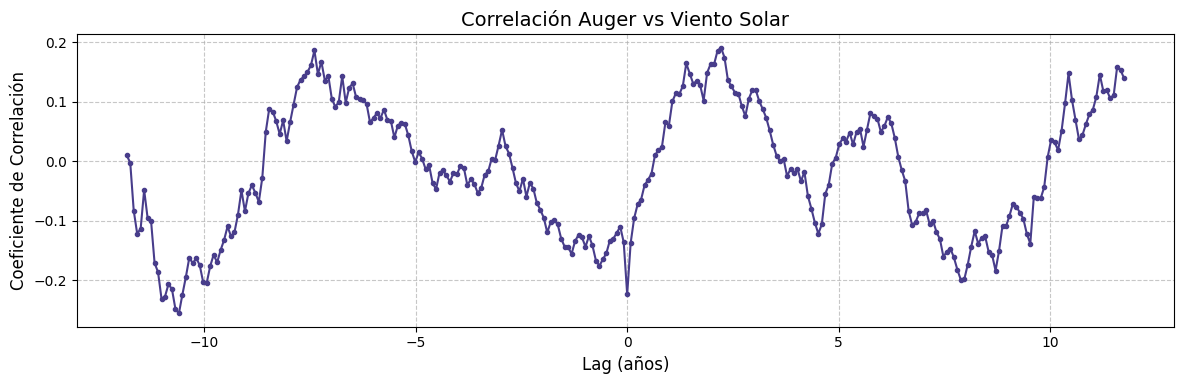

In [36]:
lags = np.arange(-30*12*12, 30*12*12, 30)  # Lags de -12 años a 12 años (en días)
correlations = []

for lag in lags:
    # Desplazar una de las columnas para calcular la correlación con lag
    shifted = df['solarw'].shift(lag)
    correlation = df['CRI'].corr(shifted)
    correlations.append(correlation)

# Convertir lags a años para la gráfica
lags_years = lags / 365.25

# Crear un gráfico de los coeficientes de correlación
plt.figure(figsize=(12, 4))
plt.plot(lags_years, correlations, marker='.', linestyle='-', color='darkslateblue')
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación Auger vs Viento Solar')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()

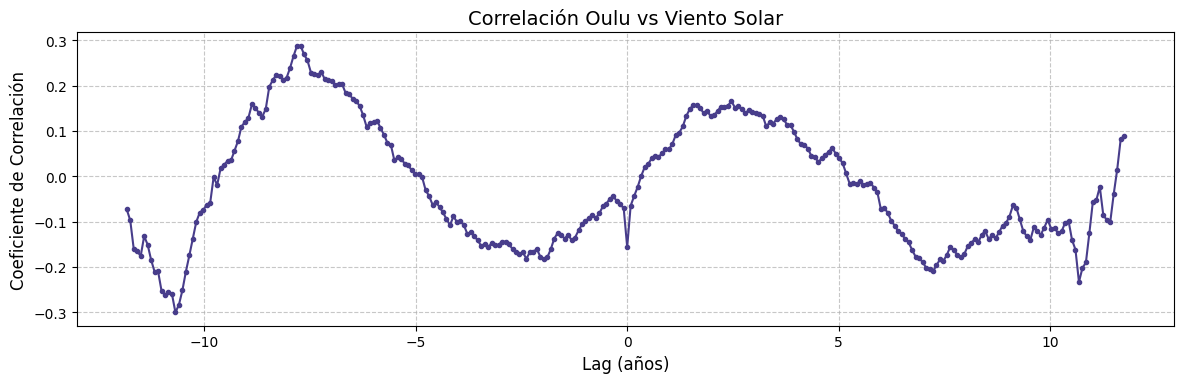

In [37]:
lags = np.arange(-30*12*12, 30*12*12, 30)  # Lags de -12 años a 12 años (en días)
correlations = []

for lag in lags:
    # Desplazar una de las columnas para calcular la correlación con lag
    shifted = df['solarw'].shift(lag)
    correlation = df['oulu'].corr(shifted)
    correlations.append(correlation)

# Convertir lags a años para la gráfica
lags_years = lags / 365.25

# Crear un gráfico de los coeficientes de correlación
plt.figure(figsize=(12, 4))
plt.plot(lags_years, correlations, marker='.', linestyle='-', color='darkslateblue')
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación Oulu vs Viento Solar')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()

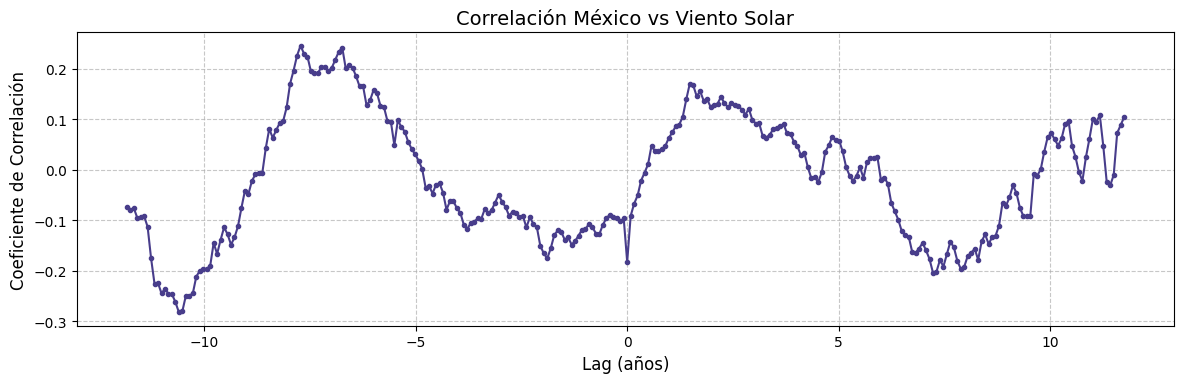

In [38]:
lags = np.arange(-30*12*12, 30*12*12, 30)  # Lags de -12 años a 12 años (en días)
correlations = []

for lag in lags:
    # Desplazar una de las columnas para calcular la correlación con lag
    shifted = df['solarw'].shift(lag)
    correlation = df['mexico'].corr(shifted)
    correlations.append(correlation)

# Convertir lags a años para la gráfica
lags_years = lags / 365.25

# Crear un gráfico de los coeficientes de correlación
plt.figure(figsize=(12, 4))
plt.plot(lags_years, correlations, marker='.', linestyle='-', color='darkslateblue')
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.title('Correlación México vs Viento Solar')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


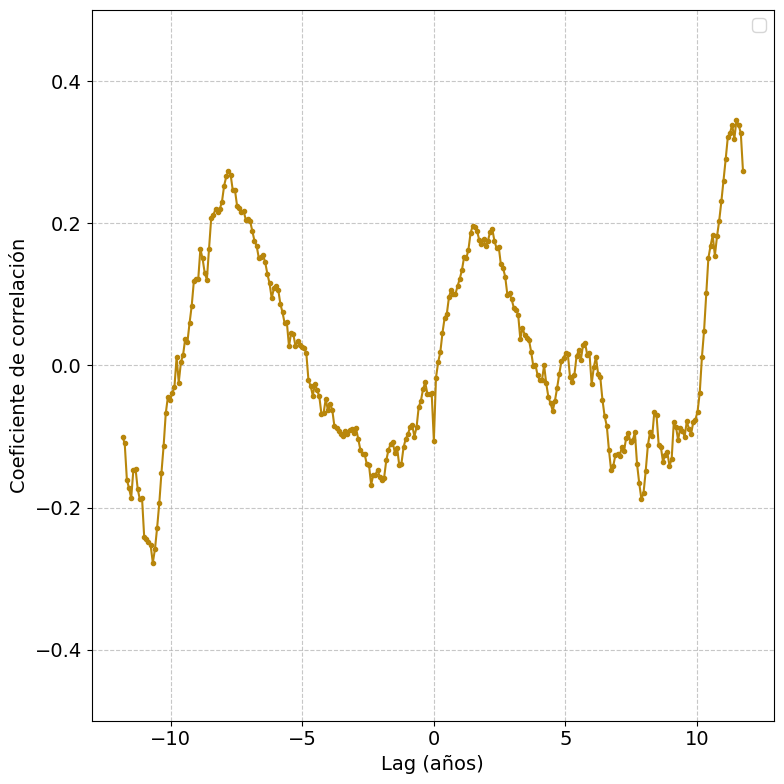

In [108]:
lags = np.arange(-30*12*12, 30*12*12, 30)  # Lags de -12 años a 12 años (en días)
correlations = []

for lag in lags:
    # Desplazar una de las columnas para calcular la correlación con lag
    shifted = df['solarw'].shift(lag)
    correlation = df['tsumeb'].corr(shifted)
    correlations.append(correlation)

# Convertir lags a años para la gráfica
lags_years = lags / 365.25

# Crear un gráfico de los coeficientes de correlación
plt.figure(figsize=(8, 8))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations, marker='.', linestyle='-', color='darkgoldenrod')
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.ylim(-0.5, 0.5)
plt.title('')

# Añadir líneas verticales en 5.5 y 11 años
#plt.axvline(x=6, color='indianred', linestyle='--', label='')
#plt.axvline(x=11.5, color='indianred', linestyle='--', label='')
#plt.axvline(x=-4.5, color='indianred', linestyle='--', label='')
#plt.axvline(x=-10, color='indianred', linestyle='--', label='')
#plt.axvline(x=1, color='indianred', linestyle='--', label='')

# Añadir etiquetas para los años en las líneas verticales
#plt.text(6, 0.65, '6 años', rotation=90, color='indianred', fontsize=14, ha='right', va='bottom')
#plt.text(11.5, 0.65, '11.5 años', rotation=90, color='indianred', fontsize=14, ha='right', va='bottom')
#plt.text(-4.5, 0.65, '4.5 años', rotation=90, color='indianred', fontsize=14, ha='right', va='bottom')
#plt.text(-10, 0.65, '10 años', rotation=90, color='indianred', fontsize=14, ha='right', va='bottom')
#plt.text(1, 0.65, '1 año', rotation=90, color='indianred', fontsize=14, ha='right', va='bottom')

plt.xlabel('Lag (años)', fontsize=14)  # Ajustar el tamaño de la fuente de la etiqueta del eje x
plt.ylabel('Coeficiente de correlación', fontsize=14) 
plt.xticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje x
plt.yticks(fontsize=14)  # Ajustar el tamaño de la fuente de los tics del eje y
plt.legend(fontsize=14)


plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()  # Añadir leyenda
plt.savefig('corr_tsumeb_sw.pdf')

plt.show()


# TEST DE CÓDIGOS
### Creo datos sintéticos y los aplico a los algoritmos

In [49]:
import numpy as np
import pandas as pd

# Parámetros
amplitude1 = 1.0
amplitude2 = 1.0
frequency = 0.1  # Frecuencia en ciclos por unidad de tiempo
phase_shift = np.pi  # Desfase de 45 grados para generar anticorrelación
num_points = 100

# Generar el tiempo
time = np.arange(0, num_points)

# Generar las dos series sinusoidales
series1 = amplitude1 * np.sin(2 * np.pi * frequency * time)
series2 = amplitude2 * np.sin(2 * np.pi * frequency * time + phase_shift)

# Crear un DataFrame
data = {'Time': time, 'Series1': series1, 'Series2': series2}
test = pd.DataFrame(data)

# Añadir ruido aleatorio para hacerlo más realista (opcional)
#noise = np.random.normal(0, 0.1, num_points)
#test['Series1'] += noise
#test['Series2'] += noise

# Visualizar las primeras filas del DataFrame
print(test.head())

# Ahora puedes usar el código de correlación cruzada que mencionaste para analizar estas series.


   Time   Series1       Series2
0     0  0.000000  1.224647e-16
1     1  0.587785 -5.877853e-01
2     2  0.951057 -9.510565e-01
3     3  0.951057 -9.510565e-01
4     4  0.587785 -5.877853e-01


(0.0, 10.0)

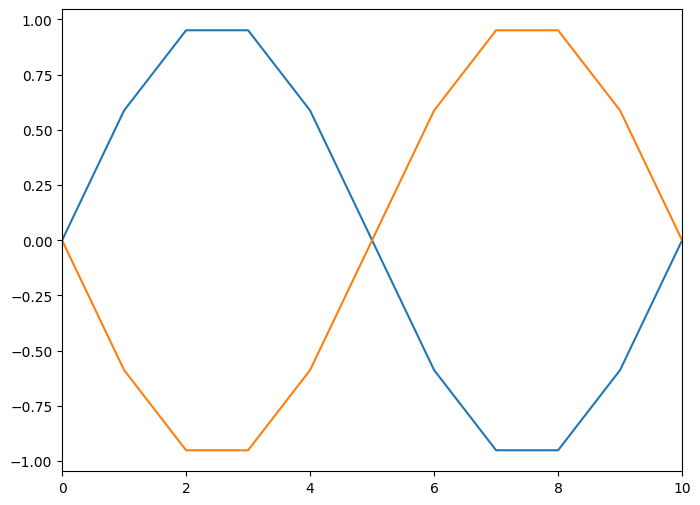

In [50]:
plt.plot(test['Time'],test['Series1'])
plt.plot(test['Time'],test['Series2'])
plt.xlim(0, 10)

## 1) Correlación a mano

In [51]:
# Establece el rango máximo de desplazamiento que deseas explorar
max_lag = 5  # Puedes ajustar esto según tus necesidades

# Inicializa una lista para almacenar los coeficientes de correlación cruzada
cross_correlations_t = []


# Calcula las medias de ambas series
mean_CRI_t = test['Series1'].mean()
mean_sunspots_t = test['Series2'].mean()

# Calcula las desviaciones estándar de ambas series
std_CRI_t = test['Series1'].std()
std_sunspots_t = test['Series2'].std()

# 6. Aplicar la fórmula de correlación cruzada para cada desplazamiento (\Delta)
for lag in range(-max_lag, max_lag + 1):
    sum_product_t = 0
    valid_data_count_t = 0

    for i in range(len(test) - abs(lag)):
        diff_CRI_t = test['Series1'].iloc[i] - mean_CRI_t
        diff_sunspots_t = test['Series2'].iloc[i + lag] - mean_sunspots_t

        if not (np.isnan(diff_CRI_t) or np.isnan(diff_sunspots_t)):
            sum_product_t += diff_CRI_t * diff_sunspots_t
            valid_data_count_t += 1

    # Calcular el coeficiente de correlación cruzada para el desplazamiento actual
    if valid_data_count_t > 0:
        cross_corr_t = (1 / (valid_data_count_t - 1)) * (sum_product_t / (std_CRI_t * std_sunspots_t))
        cross_correlations_t.append(cross_corr_t)
    else:
        cross_correlations_t.append(np.nan)

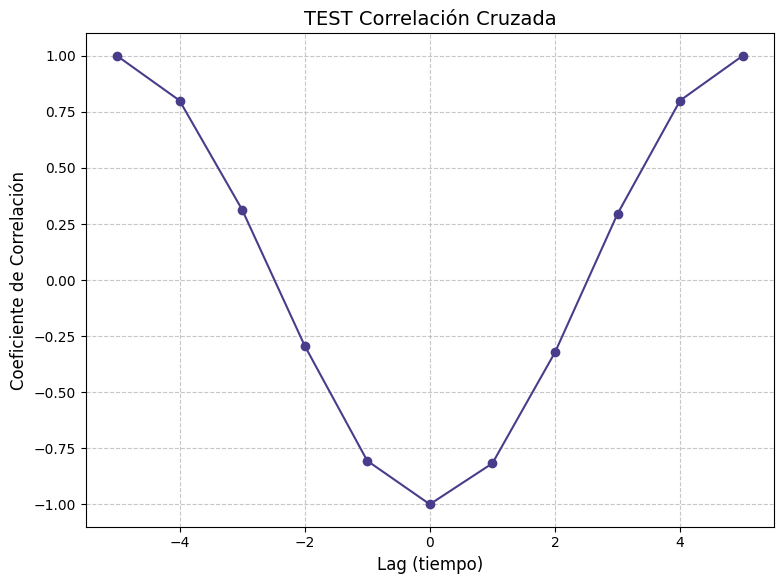

In [67]:
lag_range_t = list(range(-max_lag, max_lag + 1))
plt.plot(lag_range_t, cross_correlations_t, marker='o', linestyle='-', color='darkslateblue')  # Personaliza el color a tu elección
plt.xlabel('Lag (tiempo)')
plt.ylabel('Coeficiente de Correlación')
plt.title('TEST Correlación Cruzada')
plt.grid(True, linestyle='--', alpha=0.7)  # Añade una grilla con estilo punteado y transparencia
plt.tight_layout()  # Ajusta el espacio para que todos los elementos se muestren correctamente
plt.show()


# 2) Correlación hecha con Scipy

In [59]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Función para generar fechas desde una fecha inicial hasta una fecha final con un intervalo de días
def generate_dates(start_date, end_date, delta):
    current_date = start_date
    while current_date <= end_date:
        yield current_date
        current_date += delta

# Definir las fechas de inicio y fin
start_date = datetime(2006, 1, 1)
end_date = datetime(2021, 11, 30)

# Generar fechas con un intervalo diario
dates = list(generate_dates(start_date, end_date, timedelta(days=1)))

# Crear el DataFrame para la señal sinusoidal con periodicidad de 11 años
df_sinusoidal = pd.DataFrame({
    'date': dates,
    'CRI': np.sin(2 * np.pi * np.arange(len(dates)) / (11 * 365.25))  # Señal sinusoidal con periodicidad de 11 años
})

# Crear el DataFrame para la señal sinusoidal completamente anticorrelacionada
df_anticorrelated = pd.DataFrame({
    'date': dates,
    'CRI': -np.sin(2 * np.pi * np.arange(len(dates)) / (11 * 365.25))  # Señal sinusoidal anticorrelacionada
})

# Mostrar las primeras filas de ambos DataFrames
print("DataFrame con señal sinusoidal:")
print(df_sinusoidal.head())

print("\nDataFrame con señal sinusoidal anticorrelacionada:")
print(df_anticorrelated.head())


DataFrame con señal sinusoidal:
        date       CRI
0 2006-01-01  0.000000
1 2006-01-02  0.001564
2 2006-01-03  0.003128
3 2006-01-04  0.004692
4 2006-01-05  0.006255

DataFrame con señal sinusoidal anticorrelacionada:
        date       CRI
0 2006-01-01 -0.000000
1 2006-01-02 -0.001564
2 2006-01-03 -0.003128
3 2006-01-04 -0.004692
4 2006-01-05 -0.006255


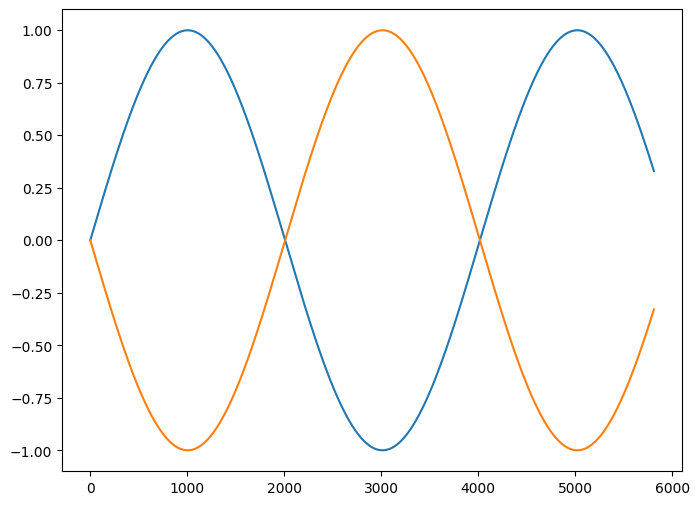

In [62]:
plt.plot(df_sinusoidal['CRI'])
plt.plot(df_anticorrelated['CRI'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


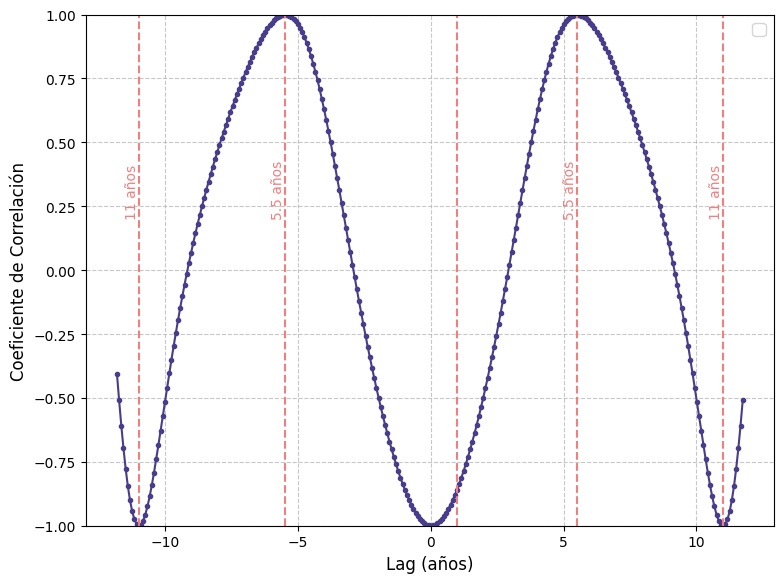

In [60]:
lags = np.arange(-30*12*12, 30*12*12, 30)  # Lags de -12 años a 12 años (en días)
correlations = []

for lag in lags:
    # Desplazar una de las columnas para calcular la correlación con lag
    shifted = df_sinusoidal['CRI'].shift(lag)
    correlation = df_anticorrelated['CRI'].corr(shifted)
    correlations.append(correlation)

# Convertir lags a años para la gráfica
lags_years = lags / 365.25

# Crear un gráfico de los coeficientes de correlación
plt.figure(figsize=(8, 6))  # Ajusté el tamaño del gráfico para una mejor visualización
plt.plot(lags_years, correlations, marker='.', linestyle='-', color='darkslateblue')
plt.xlabel('Lag (años)')
plt.ylabel('Coeficiente de Correlación')
plt.ylim(-1, 1)
plt.title('')

# Añadir líneas verticales en 5.5 y 11 años
plt.axvline(x=5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-5.5, color='lightcoral', linestyle='--', label='')
plt.axvline(x=-11, color='lightcoral', linestyle='--', label='')
plt.axvline(x=1, color='lightcoral', linestyle='--', label='')


# Añadir etiquetas para los años en las líneas verticales
plt.text(5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-5.5, 0.2, '5.5 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')
plt.text(-11, 0.2, '11 años', rotation=90, color='lightcoral', fontsize=10, ha='right', va='bottom')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend()  # Añadir leyenda
#plt.savefig('corr_auger_sn.pdf')

plt.show()